In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Getting Data ready

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Features are usually called x while label is called y
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
Y = heart_disease["target"]
Y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [5]:
# Lets split the data into training and testing 
from sklearn.model_selection import train_test_split
# train_test_split returns 4 values ones is x train second is x test and vice versa
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)

In [6]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

## Choosing a model to fit the problem

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.4106630630630631

In [9]:
# Doing the same thing on Car sales extended

In [10]:
car_sales_extended = pd.read_csv("scikit-learn-data/car-sales-extended.csv")

In [11]:
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
X = car_sales_extended.drop("Price",axis=1)
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [13]:
Y = car_sales_extended["Price"]

In [14]:
Y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2)

In [16]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Toyota'

## Converting categorical features into numbers using OneHotEncoder and ColumnTransformer


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
car_sales_extended.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001
999,Toyota,Blue,248360,4,12732


In [24]:
car_sales_extended["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [25]:
# Instantiating class OneHotEncoder
Onehot = OneHotEncoder()
categorical_features = ["Make","Colour","Doors"]
# Doors is a category because there are 856 doors that are of category 4 and so on.
transformer = ColumnTransformer([(
        "one_hot",Onehot,
        categorical_features)],remainder="passthrough")
# Columntransformer requires the encoder that we want to use and the categorical features that we are converting into numbers
# Remainder passthrough means passthrough all other features that are not defined in categorical features
# "one_hot is just a name that we have given to Onehot"

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


## What is OneHotEncoder

<img src="Screenshot/Screenshot (2).png" >

### One hot encoder takes all the values in a category and assigns one only to the attribute that is true and the rest are zeros

In [27]:
# Another way to encode but this one cant convert numbers into zeros and ones like doors column wont get encoded
dummies = pd.get_dummies(car_sales_extended[["Make","Colour","Doors"]])

In [28]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
# To produce same test results
np.random.seed(7)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y,test_size=.2)

In [30]:
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.3362899219458084

## Option 1: Fill the missing values with pandas

In [31]:
# imputing data

In [32]:
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [33]:
# total missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# You can not convert a dataset that has missing values into numbers since it does not know what to do with them
car_sales_missing["Make"].fillna("Missing",inplace=True)
car_sales_missing["Colour"].fillna("Missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [35]:
# Lets chech again how many values are missing
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
len(car_sales_missing)

1000

In [37]:
# we will drop those rows that does not have a price since its difficult to predict or cant take mean value
car_sales_missing.dropna(inplace=True)

len(car_sales_missing)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
# spliting data to train and test arrays before enconding them
X = car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [39]:
One_hot = OneHotEncoder()
categorical_data = ["Make","Colour","Doors"]
transformer = ColumnTransformer([("Onehot",One_hot,categorical_data)],remainder="passthrough")
transformed_car_sales_trained_data_set = transformer.fit_transform(X_train)
transformed_car_sales_test_data_set = transformer.transform(X_test)

In [40]:
model.fit(transformed_car_sales_trained_data_set,Y_train)

model.score(transformed_car_sales_test_data_set,Y_test)

0.1845551794259691

## Imputing with scikitlearn

In [41]:
# reading car sales extended again 
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

# viewing the missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Droping rows with missing label namely price
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]
# Spliting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Defining the columns
cat_data = ["Make","Colour"]
num_data = ["Odometer (KM)"]
doors_data = ["Doors"]

# Defining what to fill with
cat_imputer = SimpleImputer(strategy="constant",fill_value="Missing") 
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4)

# making an imputer that can fill columns with the defined values
imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_data),
                             ("num_imputer",num_imputer,num_data),
                             ("Doors_imputer",doors_imputer,doors_data)])


In [45]:
# fitting and transforming my train data on the imputer
imputed_trained_X = imputer.fit_transform(X_train)

# transforming the test data
imputed_tested_x = imputer.transform(X_test)

# checking imputed_trained_X
imputed_trained_X

array([['Toyota', 'White', 202435.0, 4.0],
       ['Honda', 'Red', 61504.0, 4.0],
       ['BMW', 'Black', 178164.0, 3.0],
       ...,
       ['Toyota', 'White', 230943.0, 4.0],
       ['Honda', 'Red', 47933.0, 4.0],
       ['Nissan', 'White', 67991.0, 3.0]], dtype=object)

In [46]:
trained_X_dataframe = pd.DataFrame(imputed_trained_X,columns=["Make","Colour","Odometer (KM)","Doors"])
trained_X_dataframe

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,202435,4
1,Honda,Red,61504,4
2,BMW,Black,178164,3
3,Honda,Green,46085,4
4,Toyota,Red,162665,4
...,...,...,...,...
755,Toyota,White,216257,4
756,Toyota,Blue,51155,4
757,Toyota,White,230943,4
758,Honda,Red,47933,4


In [47]:
tested_X_dataframe = pd.DataFrame(imputed_tested_x,columns=["Make","Colour","Odometer (KM)","Doors"])
tested_X_dataframe

,Make,Colour,Odometer (KM),Doors
0,Toyota,Blue,39311,4
1,Toyota,Blue,207048,4
2,Honda,Blue,40635,4
3,Toyota,White,119439,4
4,Nissan,White,215130,4
...,...,...,...,...
185,Nissan,Black,162523,4
186,Toyota,Missing,204213,4
187,Honda,White,74192,4
188,Toyota,Blue,215955,4


In [48]:
trained_X_dataframe.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder

Onehot = OneHotEncoder()
categorical_features = ["Make","Colour","Doors"]
# Doors is a category because there are 856 doors that are of category 4 and so on.
transformer = ColumnTransformer([(
        "one_hot",Onehot,
        categorical_features)],remainder="passthrough")
# Columntransformer requires the encoder that we want to use and the categorical features that we are converting into numbers
# Remainder passthrough means passthrough all other features that are not defined in categorical features
# "one_hot is just a name that we have given to Onehot"

transformed_X_trained = transformer.fit_transform(trained_X_dataframe)
transformed_X_tested = transformer.transform(tested_X_dataframe)

In [50]:
transformed_X_trained

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [51]:
# Choosing a model
np.random.seed(9)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(transformed_X_trained,Y_train)
model.score(transformed_X_tested,Y_test)

0.2201043226487468

## Boston data set

In [52]:
from sklearn.datasets import load_boston
# initiating boston dataset
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [53]:
# returns dataset in dictionary form where data,target,feature_names are the keys
# making a datframe of boston
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
# Lets add target key into the datframe as well
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
# To make our results reproducable
np.random.seed(42)
# lets split the test data
X = boston_df.drop("target",axis=1)
Y=boston_df["target"]
X_train_boston,X_test_boston,Y_train_boston,Y_test_boston = train_test_split(X,Y,test_size=0.2)

In [55]:
len(boston_df)

506

In [56]:
X_train_boston.shape,X_test_boston.shape

((404, 13), (102, 13))

In [57]:
# importing ridge model and then fitting the dataset
from sklearn.linear_model import Ridge
ridge_regression_model = Ridge()
ridge_regression_model.fit(X_train_boston,Y_train_boston)
ridge_regression_model.score(X_test_boston,Y_test_boston)

0.6662221670168522

## Using another estimator/Algorithm to improve the score

In [58]:
np.random.seed(42)
# Data has alreday been split
from sklearn.ensemble import RandomForestRegressor
# works on the basis of decision tree
rf = RandomForestRegressor()
# Instantiating the model
rf.fit(X_train_boston,Y_train_boston)
rf.score(X_test_boston,Y_test_boston)

0.8896648705127477

In [59]:
# Decision trees are the if else programs like what we have studied in pseudocode but what the model does it creates its own
# if else program by finding patterns in the data.

## Chossing a model for classification problem


In [60]:
# To reproduce our results
np.random.seed(42)
# lets import our heart disease dataset
heart_disease = pd.read_csv("scikit-learn-data/heart-disease.csv")
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]
# split the data
X_train_heart_disease,X_test_heart_disease,Y_train_heart_disease,Y_test_heart_disease = train_test_split(X,Y,train_size=0.8)

from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train_heart_disease,Y_train_heart_disease)
clf.score(X_test_heart_disease,Y_test_heart_disease)

D:\machine_learning_project_folder\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4918032786885246

## Lets use another Classification Estimator - RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfclf.fit(X_train_heart_disease,Y_train_heart_disease)
rfclf.score(X_test_heart_disease,Y_test_heart_disease)

0.8524590163934426

## Let's predict with our model


In [62]:
y_preds = rfclf.predict(X_test_heart_disease)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
# lets compare the predicted sets with the correct labels(truth)
np.mean(Y_test_heart_disease==y_preds)

0.8524590163934426

In [64]:
# 'score()' Does the samae thing

In [65]:
rfclf.score(X_test_heart_disease,Y_test_heart_disease)

0.8524590163934426

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_heart_disease,y_preds)
# 'accuracy_score ()' also evaluates our model on the basis of predictions

0.8524590163934426

Make predictions with 'predict_proba()'

In [67]:
# predict() vs predict proba
# predict proba returns the probabilities of the classes(labels/whether 1 or 0/has heart_disease or not)
rfclf.predict_proba(X_test_heart_disease[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

In [68]:
rfclf.predict(X_test_heart_disease[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [69]:
# in the predict proba it is saying that the probability of "target"/label being 0 is .89 thats why predict returns 0.predict just
# returns label based on the probability but predict proba tells the probability which also shows where our model is more confident

## Lets have some practice with boston dataset and regression model and then predict

In [70]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [72]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor().fit(X_train_boston,Y_train_boston)
rfregressor.score(X_test_boston,Y_test_boston) # Different methods of evaluation for different models.Here it is showing accuracy

0.8895937542377453

In [73]:
y_preds_regressor = rfregressor.predict(X_test_boston)

In [74]:
y_preds_regressor[:10]

array([23.194, 30.175, 17.587, 23.697, 16.61 , 21.206, 19.264, 15.431,
       21.319, 21.035])

In [75]:
np.array(Y_test_boston[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [76]:
# Another evaluation metric is to see how far on average each predicted number is
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test_boston,y_preds_regressor)

2.0828039215686274

<img src="https://www.statisticshowto.com/wp-content/uploads/2016/10/MAE.png" >
<figcaption>"Formula of Mean Absolute Error "<figcaption/>

## Evaluating our machine learning model
* using the score method that we have been using.
* The scoring parameter.
* problem specific metrics

### Using the score method

In [77]:
# Using score method on a classifier problem.Heart_Disease data and randomForestClassifier
rfclf.score(X_test_heart_disease,Y_test_heart_disease)

0.8524590163934426

In [78]:
# what it is doing is predicting the y label of the X_test and then coparing those predicted labels qith the truth i.e Y_test

In [79]:
# Using score method on a regressor.Boston data and RandomForestRegressor
rfregressor.score(X_test_boston,Y_test_boston)

0.8895937542377453

In [80]:
# The score method uses different stats for different models.In clf case it is using mean_accuracy while in regresssion model
# it is using coefficient of determination

### Using the scoring parameter

#### We will be using Cross Validation Score
<img src="Screenshot/Cross_Validation.png" >
<figcaption>5 Fold cross validation <figcaption/    

In [81]:
from sklearn.model_selection import cross_val_score
rfclf.score(X_test_heart_disease,Y_test_heart_disease),cross_val_score(rfclf,X,Y,scoring=None,cv=10)#10 fold cross_val

(0.8524590163934426,
 array([0.90322581, 0.80645161, 0.90322581, 0.93333333, 0.9       ,
        0.8       , 0.8       , 0.86666667, 0.73333333, 0.83333333]))

In [82]:
#By using Cross validation we are ensuring that the test data wasn't too easy when we split it through 'train_test_split' 
# Scoring parameter if not defined uses the parameter that score() uses.In case of classification it is using mean accuracy

## Metrics of Evaluation For Classification Model
* Accuracy
* Area under the ROC curve
* Confusion Metrics
* Classification Report

**Accuracy**

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

rfclf = RandomForestClassifier()
cross_val_score = cross_val_score(rfclf,X,Y,cv=10) #By default scoring is mean_accuracy

In [84]:
np.mean(cross_val_score)

0.8183870967741935

In [85]:
print(f"The mean accuracy of heart disease classifier is: {np.mean(cross_val_score) * 100 :.2f}%") 
# print(f"") is the formated string in which you can define your variables in curly braces that saves you from closing and opening 
# the quotes to insert variables. ":.2f" is being used to curb the result to two decimal places.

The mean accuracy of heart disease classifier is: 81.84%


**Area Under the Curve(AUC)/ROC(Receiver operating characteristics)**

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [86]:
from sklearn.metrics import roc_curve
rfclf = RandomForestClassifier().fit(X_train_heart_disease,Y_train_heart_disease) 
Y_probs = rfclf.predict_proba(X_test_heart_disease)

In [87]:
Y_probs[:5]

array([[0.93, 0.07],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.81, 0.19],
       [0.24, 0.76]])

In [88]:
Y_positive_probs = Y_probs[:,1] #Column one that is class = 1's all records 
fpr,tpr,threshold = roc_curve(Y_test_heart_disease,Y_positive_probs)

In [89]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.13793103, 0.24137931,
       0.24137931, 0.27586207, 0.34482759, 0.4137931 , 0.48275862,
       0.55172414, 0.65517241, 0.65517241, 0.86206897, 1.        ])

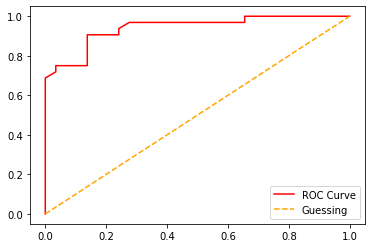

In [90]:
# The values are making no sense lets plot them
import matplotlib.pyplot as plt
def ROC_curve_plotter(fpr,tpr):
    
#     Plots a ROC curve with arguments as fpr and tpr
    plt.plot(fpr,tpr,color="r",label="ROC Curve")
    plt.plot([0,1],[0,1],ls="--",color='Orange',label="Guessing") # Guessing line
#     customizing the plot
    plt.xlabel = "False Positive Rate"
    plt.ylabel = "True Positive Rate"
    plt.title = "Receiver Operating Curve"
    plt.legend()
    plt.show()
ROC_curve_plotter(fpr,tpr)    

In [91]:
from sklearn.metrics import roc_auc_score # importing Area under curve method
roc_auc_score(Y_test_heart_disease,Y_positive_probs)

0.9407327586206896

**Confusion matrix**


In [92]:
# Lets import Confusion matrix
from sklearn.metrics import confusion_matrix
Y_preds = rfclf.predict(X_test_heart_disease)
con_matrix= confusion_matrix(Y_test_heart_disease,Y_preds)

In [93]:
con_matrix

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [94]:
# Lets visualize the matrix with pd.crosstab()
pd.crosstab(Y_test_heart_disease,
           Y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,3,29


### This is showing that there are 5 false positives and 3 false negatives.
<img src="Screenshot/Confusion_matrix.png" >

### Installing other packages within jupyter notebook

In [95]:
# lets visualize it on another module called seaborn heatmap()
# we have not installed seaborn library.Lets install it
import sys  # It will give jupyter notebook access to the system 
!conda install --yes --prefix {sys.prefix} seaborn   
#"!" tells that it is a command prompt command.
# Prefix tells the path

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




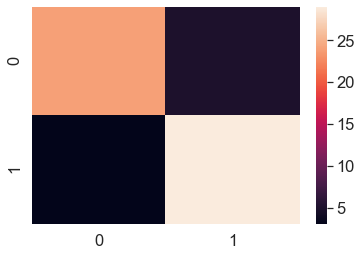

In [96]:
import seaborn as sns
# create a confusion matrix
con_matrix
# increasing font size
sns.set(font_scale=1.5) 
# Plotting the con matrix on heatmap
sns.heatmap(con_matrix);

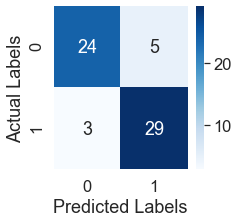

In [97]:
# Lets create a function that can fill the data in the boxes
def conf_matrix_plotter(conf_matrix):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_matrix,
               annot=True,
               cmap="Blues")
#     Cmap stands for color map
# Annot is annotation so boxes are filled with annotation from the conf matrix 
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")
conf_matrix_plotter(con_matrix)    

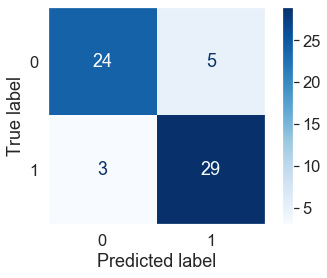

In [98]:
# Another way of plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfclf,X_test_heart_disease,Y_test_heart_disease,cmap="Blues",normalize=None);
#                       Normalise is showing the probabilities of the confusion matrix instead of the values when true
plt.grid(False) # To get rid of white lines






**Classification Report**

In [99]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_heart_disease,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### what is a classification report?
<img src="Screenshot/Classification_Report.png">

<div class = "row">
    <div class="column" > 
        <img src="Screenshot/Precision.png" padding="5px" margin=""10px>
    </div>
    <div class="column" > 
        <img src="Screenshot/Recall.png" padding="5px" margin = "10px">
    </div>
</div>        

## Regression metrics.
* R^2 (pronounced r-squared) or coefficient of determination - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**R^2 / coefficient of determination**

In [100]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [101]:
np.random.seed(42)
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

from sklearn.model_selection import train_test_split
X_train_boston,X_test_boston,Y_train_boston,Y_test_boston= train_test_split(X,Y,test_size=0.2)
rfregressor = RandomForestRegressor().fit(X_train_boston,Y_train_boston)
rfregressor.score(X_test_boston,Y_test_boston) # By default score uses r2_score for regression models

0.873969014117403

In [102]:
# Creating a predicted label array that has mean as the value for all the elements.Since r2 compa
Y_preds = np.full(len(Y_test_boston),np.mean(Y_test_boston)) # filling an arrray with value of mean of the true labels and shape of 
# of the true labels
Y_preds[:6]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529])

In [103]:
r2_score(Y_test_boston,Y_preds)  # score should be zero since all the predicted labels are the mean value of the actual labels

0.0

In [104]:
r2_score(Y_test_boston,Y_test_boston) # score should be 1 as all the predicted labels are the true labels

1.0

**Mean Abosulte Error**

In [105]:
from sklearn.metrics import mean_absolute_error
y_preds_regressor = rfregressor.predict(X_test_boston)
MAE = mean_absolute_error(Y_test_boston,y_preds_regressor)
MAE

2.1226372549019623

In [106]:
# lets see the predicted and actual labels in a dataframe
MAE_df = pd.DataFrame({"Actual_labels" : Y_test_boston,"Predicted_labels": y_preds_regressor})
MAE_df

,Actual_labels,Predicted_labels
173,23.6,23.002
274,32.4,30.826
491,13.6,16.734
72,22.8,23.467
452,16.1,16.853
...,...,...
412,17.9,13.030
436,9.6,12.490
411,17.2,13.406
86,22.5,20.219


In [107]:
# Lets another column called the differences
MAE_df["Difference"] = MAE_df["Actual_labels"] - MAE_df["Predicted_labels"]

MAE_df

,Actual_labels,Predicted_labels,Difference
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,-3.134
72,22.8,23.467,-0.667
452,16.1,16.853,-0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,-2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


In [108]:
# What does absolute means is turning the negative numbers into positive and adding up.Then taking the mean

**Mean Square Error**
The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).


In [109]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test_boston,y_preds_regressor)
mse

9.242328990196082

In [110]:
# Calculating manually
squared_differences=np.square(MAE_df["Difference"])
np.mean(squared_differences)

9.242328990196082

### what and when to use different metrics
<img src="Screenshot/Summary_of_regression_metrics.png">

### The scoring() parameter .

In [111]:
# Lets practice building a classifier model again
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

X_train_heart_disease,X_test_heart_disease,Y_train_heart_disease,Y_test_heart_disease=train_test_split(X,Y,test_size=.2)
rfclf = RandomForestClassifier().fit(X_train_heart_disease,Y_train_heart_disease)

# Lets Cross validate
cv_accuracy = cross_val_score(rfclf,X,Y,cv=5,scoring=None)
cv_accuracy.mean()

0.811639344262295

In [112]:
np.random.seed(42)
cv_accuracy = cross_val_score(rfclf,X,Y,cv=5,scoring="accuracy")
np.mean(cv_accuracy)

0.8248087431693989

In [113]:
# lets try precision - when identifying false positives are more important than false negatives
cv_precision = cross_val_score(rfclf,X,Y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [114]:
# lets try recall
cv_recall = cross_val_score(rfclf,X,Y,cv=10,scoring="recall")
np.mean(cv_recall)

0.8654411764705883

In [115]:
# lets try f1 sscore
cv_f1 = cross_val_score(rfclf,X,Y,cv=10,scoring="f1")
np.mean(cv_f1)

0.8471486027266961

### Lets use scoring() parameter with regression models


In [116]:
np.random.seed(42)
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

rfregressor = RandomForestRegressor().fit(X_train_boston,Y_train_boston)
cv_r2 = cross_val_score(rfregressor,X,Y,cv=10,scoring="r2")
cv_r2

array([ 0.70629051,  0.79006455,  0.34340936,  0.78164833,  0.84264472,
        0.72016241,  0.58925771,  0.37902997, -0.64146857,  0.2714861 ])

In [117]:
# Mean squared error
cv_mse = cross_val_score(rfregressor,X,Y,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.708031016055124

In [118]:
# Mean Absolute Error
cv_mae = cross_val_score(rfregressor,X,Y,scoring="neg_mean_absolute_error")
cv_mae

array([-2.13696078, -2.65644554, -3.45683168, -3.66479208, -3.27979208])

### Evaluating using specific metrics method

**Classification built in functions**


In [119]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)

model = RandomForestClassifier().fit(X_train,Y_train)
Y_preds = model.predict(X_test)

print("The classifier metrics of the model are:")
print(f"The accuracy of the model is :{accuracy_score(Y_test,Y_preds)*100:.2f}%")
print(f"The precision of the model is:{precision_score(Y_test,Y_preds)}")
print(f"The recall of the model is :{recall_score(Y_test,Y_preds)}")
print(f"The f1 score of the model is :{f1_score(Y_test,Y_preds)}")

The classifier metrics of the model are:
The accuracy of the model is :85.25%
The precision of the model is:0.8484848484848485
The recall of the model is :0.875
The f1 score of the model is :0.8615384615384615


**Regression Evaluation using metrics functions**

In [120]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

model = RandomForestRegressor().fit(X_train,Y_train)
Y_preds = model.predict(X_test)

print("The regression metrics of the model are:")
print(f"The coefficient of determination is:{r2_score(Y_test,Y_preds)}")
print(f"The Mean Absolute Error is:{mean_absolute_error(Y_test,Y_preds)}")
print(f"The Mean squared error is:{mean_squared_error(Y_test,Y_preds)}")


The regression metrics of the model are:
The coefficient of determination is:0.8739690141174031
The Mean Absolute Error is:2.1226372549019623
The Mean squared error is:9.242328990196082


### Improving model

The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

*From a data perspective asks:*

* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

*From a model perspective asks:*

* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

*Note*: Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

In [121]:
# How to check all the parameters of a model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

### Hyper tuning by hand/manually

we're going to try :
* 'max_depth'
* 'min_samples_leaf'
* 'min_samples_split'
* 'max_features'
* 'n_estimators'

In [122]:
# Since we want to print classification metrics quite a few times in our case 2 times we would like to construct a function

def classification_evaluator(Y_true,Y_preds):
    '''
    The Function returns evalution metrics for a Classification model
    '''
    accuracy = accuracy_score(Y_true,Y_preds)
    precision = precision_score(Y_true,Y_preds)
    recall = recall_score(Y_true,Y_preds)
    f1 = f1_score(Y_true,Y_preds)
    
#   want to return a dictionary with the key values
    metrics_dict = {"Accuracy": round(accuracy,2),
                    "Precision": round(precision,2),
                    "Recall": round(recall,2),
                    "F1_score":f1}
    
    print(f"Acc:{accuracy*100:2f}%")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1_score:{f1}")
    
    return metrics_dict 

In [123]:
# We will be splitting data into train_set validate_set and test_set manually
shuffled_heart_disease = heart_disease.sample(frac=1) # Shuffling the data to avoid a sequential split

X = shuffled_heart_disease.drop("target",axis = 1)
Y = shuffled_heart_disease["target"]

train_set = round(.7 *len(shuffled_heart_disease)) # we need values to split(Slice)
validate_set = round(train_set+0.15*len(shuffled_heart_disease))

X_train,Y_train = X[:train_set] , Y[:train_set]
X_validate , Y_validate = X[train_set:validate_set] , Y[train_set:validate_set]
X_test , Y_test = X[validate_set:] , Y[validate_set:]

In [124]:
len(X_test),len(X_validate),len(X_train)

(46, 45, 212)

In [125]:
rfclf = RandomForestClassifier().fit(X_train,Y_train)
Y_preds = rfclf.predict(X_validate)

In [126]:
baseline_metrics = classification_evaluator(Y_validate,Y_preds)

Acc:80.000000%
Precision:0.7586206896551724
Recall:0.9166666666666666
F1_score:0.830188679245283


In [127]:
# lets initiate another model with n_estimators = 1000
rfclf2 = RandomForestClassifier(n_estimators = 1000)
rfclf2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
Y_preds_2 = rfclf2.predict(X_validate)

In [129]:
base_metrics_2 = classification_evaluator(Y_validate,Y_preds_2) 

Acc:80.000000%
Precision:0.7419354838709677
Recall:0.9583333333333334
F1_score:0.8363636363636364


In [130]:
# n_estimators is not improving pur model 

In [131]:
# lets try max_depth
rfclf_3 = RandomForestClassifier(max_depth=100)
rfclf_3.fit(X_train,Y_train)
Y_preds_3 = rfclf_3.predict(X_validate)
basline_metrics_3 = classification_evaluator(Y_validate,Y_preds_3)

Acc:77.777778%
Precision:0.7333333333333333
Recall:0.9166666666666666
F1_score:0.8148148148148148


In [132]:
# Hyper tuning by hand is taking lots of time lets use automatic ways

### Hyperparameter tuning using RandomisedSearchCV

In [133]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis= 1)
Y = heart_disease["target"]

Grid = {"n_estimators":[10,100,200,500,1000,1200],
        "min_samples_leaf":[2,4,6],
        "max_depth":[None,5,10,20,30],
        "min_samples_split":[2,4],
        "max_features":["auto","sqrt"]}
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
rfclf = RandomForestClassifier(n_jobs=1)

rs_rfclf = RandomizedSearchCV(estimator=rfclf,
                           n_iter=10,
                           param_distributions=Grid,
                           cv=5,
                           verbose=2)

# Fit the randomised cv model
rs_rfclf.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.9s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=200, min_samp

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=6, ma

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [134]:
rs_rfclf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 20}

In [135]:
rs_Y_preds = rs_rfclf.predict(X_test)
rs_metrics = classification_evaluator(Y_test,rs_Y_preds)

Acc:86.885246%
Precision:0.8529411764705882
Recall:0.90625
F1_score:0.8787878787878787


### Hyperparamater tuning using GridSearchCV
GridSearchCV is like bruteforce it tries all the combinations in the grid

In [136]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
X = heart_disease.drop("target",axis= 1)
Y = heart_disease["target"]

# Reducing Grid to reduce processing power and time
Grid_2 = {"n_estimators":[100,200,500],
        "min_samples_leaf":[4,6],
        "max_depth":[5,10,20],
        "min_samples_split":[2,4],
        "max_features":["auto","sqrt"]}

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=1) # Defining the processor/cores to use
grid_rfclf = GridSearchCV(estimator=clf,
                          param_grid=Grid_2,
                          verbose = 2,
                          cv =5)

grid_rfclf.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [137]:
grid_rfclf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [139]:
grid_Y_preds = grid_rfclf.predict(X_test)
grid_metrics = classification_evaluator(Y_test,grid_Y_preds)

Acc:86.885246%
Precision:0.8529411764705882
Recall:0.90625
F1_score:0.8787878787878787


In [141]:
# Lets compare the models
model_compare = pd.DataFrame({"Grid_Metrics":grid_metrics,
                              "RandomSearch":rs_metrics,
                               "Baseline_metrics1":baseline_metrics,
                               "Baseline_2":base_metrics_2})
model_compare

,Grid_Metrics,RandomSearch,Baseline_metrics1,Baseline_2
Accuracy,0.870000,0.870000,0.800000,0.800000
Precision,0.850000,0.850000,0.760000,0.740000
Recall,0.910000,0.910000,0.920000,0.960000
F1_score,0.878788,0.878788,0.830189,0.836364


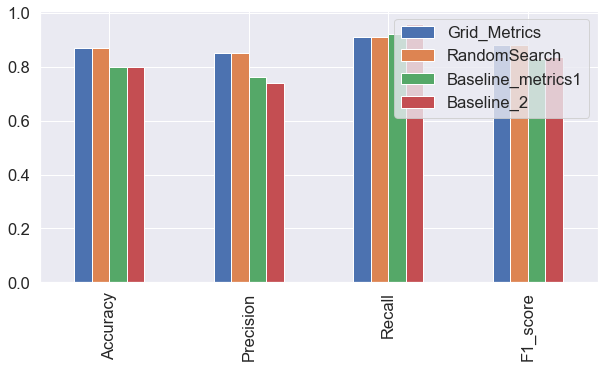

In [150]:
model_compare.plot.bar(figsize=(10,5));

### Lets save and load our models
* Using pickle's load and dump method
* Using joblib

In [152]:
import pickle
pickle.dump(grid_rfclf,open("GridSearch_Random_Forest.pkl","wb"))

In [154]:
# load the modle 
loaded_model = pickle.load(open("GridSearch_Random_Forest.pkl","rb"))

In [155]:
pickle_Y_preds = loaded_model.predict(X_test)
classification_evaluator(Y_test,pickle_Y_preds)

Acc:86.885246%
Precision:0.8529411764705882
Recall:0.90625
F1_score:0.8787878787878787


{'Accuracy': 0.87,
 'Precision': 0.85,
 'Recall': 0.91,
 'F1_score': 0.8787878787878787}

**Joblib**

In [157]:
from joblib import load,dump
# To save a model
dump(grid_rfclf,filename="_GridSearch_Random_Forest1.joblib")

['_GridSearch_Random_Forest1.joblib']

In [158]:
joblib_model = load(filename="_GridSearch_Random_Forest1.joblib")
Y_preds_joblib = joblib_model.predict(X_test)
classification_evaluator(Y_test,Y_preds_joblib)

Acc:86.885246%
Precision:0.8529411764705882
Recall:0.90625
F1_score:0.8787878787878787


{'Accuracy': 0.87,
 'Precision': 0.85,
 'Recall': 0.91,
 'F1_score': 0.8787878787878787}

### Putting it all together in one cell
* We need to fill the missing values
* convert them to numbers
* fit the model
*Hypertune it

In [159]:
data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

In [160]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Lets initiate a random seed
import numpy as np
np.random.seed(42)

# lets fill the missing values
data.dropna(subset=["Price"],inplace=True)

# Defining the categories and then making an imputer using Pipelines.We are also encoding the Categorical_features.
categorical_features = ["Make","Colour"]
numerical_feature = ["Odometer (KM)"]
Door_feature = ["Doors"]


Cat_transformer = Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="constant",fill_value="Missing")),
    ("One_Hot",OneHotEncoder(handle_unknown="ignore"))])
Num_transformer = Pipeline(steps=[
    ("Num_Imputer",SimpleImputer(strategy="mean"))
])
Door_transformer = Pipeline(steps=[
    ("Door_imputer",SimpleImputer(strategy="constant",fill_value=4.0))
])

# Preprocessing (Filling missing values and then converting to numbers)
preprocessor = ColumnTransformer(transformers=[("Categorical_transformer",Cat_transformer,categorical_features),
                     ("Numerical_transformer",Num_transformer,numerical_feature),
                     ("Door_transformer",Door_transformer,Door_feature
                     )])
# 
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor())
])

# Splitting the data
X = data.drop("Price",axis=1)
Y = data["Price"]

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size=0.2)

# Fitting and evaluating the data
model.fit(X_train1, Y_train1)
model.score(X_test1,Y_test1)

# When model.fit is going to run it will call the model which will run the pipeline that initiates the model and does preprocessing.
# When preprocessor is going to run it will transform/fill the values by calling imputers.Only categorical features will be 
# encoded as its transformer has got another instruction of encoding the data.

0.2222166113612053

it's also possible to use 'GridSearchCV' or 'RandomizedSearchCV' with 'Pipeline'.

In [174]:
Pipe_grid = {"preprocessor__Numerical_transformer__Num_Imputer__strategy":["mean","median"],
             "model__n_estimators":[100,1000],
             "model__max_depth":[10,20],
             "model__max_features":["auto"],
             "model__min_samples_leaf":[4,6],
             "model__min_samples_split":[2,4]}
gd_model = GridSearchCV(model,Pipe_grid,
                       verbose =2,
                       cv =5)

gd_model.fit(X_train1,Y_train1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=10, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer__strategy=mean 
[CV]  model__max_depth=20, model__max_features=auto, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=100, preprocessor__Numerical_transformer__Num_Imputer_

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('Categorical_transformer',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('Imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                

In [175]:
gd_model.score(X_test1,Y_test1)

0.33472995003074846